## MNIST using Logistic regression

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()


In [2]:
type(digits.data)

numpy.ndarray

In [3]:
type(digits.target)

numpy.ndarray

In [4]:
print('Image data shape',digits.data.shape)

Image data shape (1797, 64)


In [5]:
print('Label data shape',digits.target.shape)

Label data shape (1797,)


In [6]:
import matplotlib.pyplot as plt 
import numpy as np

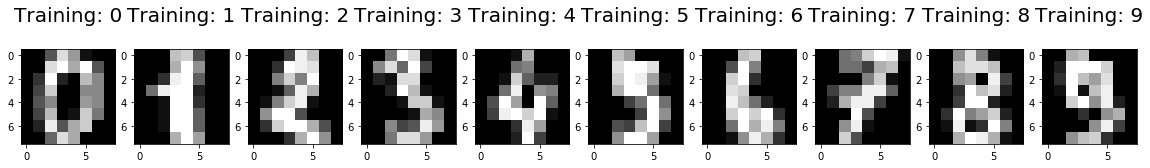

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
def costFunctionReg(theta, X, y,lmbda):
    m = len(y)
    e=10**(-6) 
    temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta)+e)))
    temp2 = np.multiply(1-y, np.log(1-sigmoid(np.dot(X, theta))+e))
    return np.sum(temp1 + temp2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)

In [11]:
def gradRegularization(theta, X, y,lmbda):
    m = len(y)
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda / m
    return temp

In [12]:
X = x_train
Y = y_train


In [13]:
m = len(Y)
n = len(y_test)
ones_test = np.ones((n,1))
ones = np.ones((m,1))
X = np.hstack((ones, X))
x_test = np.hstack((ones_test, x_test))
print(X.shape)
print(x_test.shape)

(1347, 65)
(450, 65)


In [14]:
(m,n) = X.shape

In [15]:
m,n

(1347, 65)

In [16]:
type(digits.data)

numpy.ndarray

In [17]:
import scipy

In [18]:
lmbda = 0.1
k = 10
theta = np.zeros((k,n)) #inital parameters
for i in range(k):
    digit_class = i
    theta[i] = scipy.optimize.fmin_cg(f = costFunctionReg, x0 = theta[i],  fprime = gradRegularization, args = (X, (Y == digit_class).flatten(), lmbda), maxiter = 5)

         Current function value: 0.014070
         Iterations: 5
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 0.097157
         Iterations: 5
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 0.024841
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 0.065337
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 0.029023
         Iterations: 5
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 0.032628
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 0.028947
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 0.019391
         Iterations: 5
      

In [19]:
def prediction(X,theta,y):
    pred = np.argmax(X @ theta.T, axis = 1)
    return np.mean(pred == y.flatten()) * 100
    


In [20]:
print(prediction(X,theta,Y))

94.87750556792874


In [21]:
print(prediction(x_test,theta,y_test))

93.77777777777779


In [49]:
def probability(x,theta):
    y = sigmoid(np.dot(x, theta.T))
    return y


In [80]:
def predict(x):
    pred = []
    m,n = x.shape
    for i in range (0,m):
        h_x = probability(x[i],theta)
        z = np.argmax(h_x)
        pred.append(z)  
    return pred


In [81]:
def accuracy(x, actual_classes):
    predicted_classes = (predict(x))
    predicted_classes = predicted_classes
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100

In [82]:
accuracy(X, Y.flatten())


94.87750556792874

In [84]:
accuracy(x_test,(y_test).flatten())

93.77777777777779